In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [45]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')

C:\Users\Vlad\AppData\Local\Temp\ipykernel_2632\1310205317.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,

In [46]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [47]:
data.isnull().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

In [48]:
threshold = 0.9
print(len(data))
deleate = int(len(data) * (1 - threshold))
df_clean = data.dropna(axis=1,thresh=deleate)
df_clean = df_clean.drop_duplicates(subset=['client_id'])
df_clean

14456


,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2023-01-01,8294,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,NaN,NaN,NaN,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14431,2022-10-01,4919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14446,2022-10-01,8302,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148


In [49]:
df_clean.shape

(4817, 711)

<Axes: >

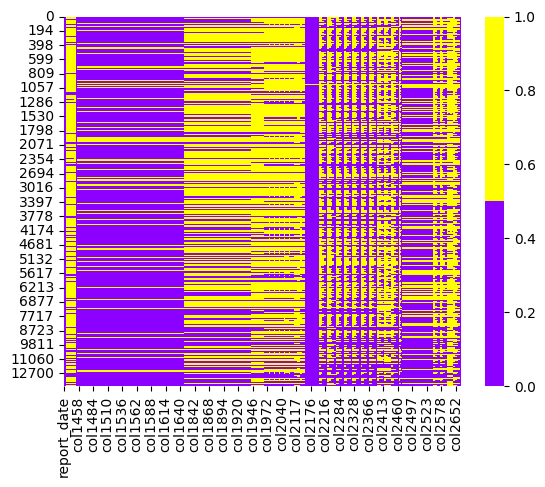

In [50]:
cols = df_clean.columns
#фиолетовые - не пропущенные данные, желтые - пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(df_clean[cols].isnull(), cmap=sns.color_palette(colours))

In [51]:
missing_percentage = df_clean.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col476         83.246834
col480         83.246834
                 ...    
col2656        51.152169
col2660        39.505917
col2661        39.505917
col2662        39.505917
col2663         0.000000
Length: 711, dtype: float64


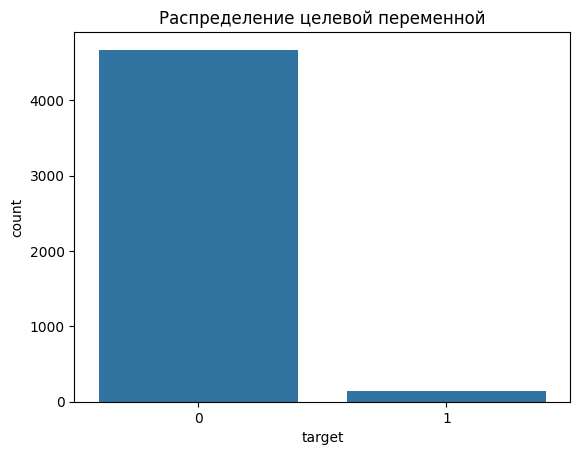

In [52]:
sns.countplot(x='target', data=df_clean)
plt.title('Распределение целевой переменной')
plt.show()

In [53]:
df_clean.head(10)

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [54]:
df_sorted = data.sort_values(by='col2663', ascending=False)
df_sorted.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
14073,2023-02-01,1150,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
8996,2022-11-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
6389,2022-12-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
790,2022-08-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
564,2023-02-01,843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338927


In [55]:
object_columns = df_clean.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': ['report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454']


In [56]:
df_clean = df_clean.drop(columns=['client_id','report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454'])


In [57]:
object_columns = df_clean.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': []


In [58]:
df_clean = df_clean.replace(0, np.nan)  # Временно заменяем нули на NaN
df_clean = df_clean.fillna(df_clean.mode().iloc[0])

In [59]:
df_clean.head(5000)

,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256261
1,1.0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,37.617100,37.6171,...,3000000.0,3000000.0,3000000.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256261
3,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.258682
4,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14431,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.257217
14434,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14446,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148


In [62]:
column_names = df_clean.columns.tolist()
column_names

['target',
 'col476',
 'col480',
 'col484',
 'col488',
 'col492',
 'col496',
 'col500',
 'col504',
 'col508',
 'col512',
 'col1453',
 'col1455',
 'col1456',
 'col1457',
 'col1458',
 'col1459',
 'col1460',
 'col1461',
 'col1462',
 'col1463',
 'col1464',
 'col1465',
 'col1466',
 'col1467',
 'col1468',
 'col1469',
 'col1470',
 'col1471',
 'col1472',
 'col1473',
 'col1474',
 'col1475',
 'col1476',
 'col1477',
 'col1478',
 'col1479',
 'col1480',
 'col1481',
 'col1482',
 'col1483',
 'col1484',
 'col1485',
 'col1486',
 'col1487',
 'col1488',
 'col1489',
 'col1490',
 'col1491',
 'col1492',
 'col1493',
 'col1494',
 'col1495',
 'col1496',
 'col1497',
 'col1498',
 'col1499',
 'col1500',
 'col1501',
 'col1502',
 'col1503',
 'col1504',
 'col1505',
 'col1506',
 'col1507',
 'col1508',
 'col1509',
 'col1510',
 'col1511',
 'col1512',
 'col1513',
 'col1514',
 'col1515',
 'col1516',
 'col1517',
 'col1518',
 'col1519',
 'col1520',
 'col1521',
 'col1522',
 'col1523',
 'col1524',
 'col1525',
 'col1526',
 'c

In [60]:
df_clean.to_csv('train_edit3.csv', index=False)